# Francesca Bruno
# Final Project Part 4
# 12/11/2024
# Answering two questions about the dataset with graphs

In [342]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as p

In [343]:
df = pd.read_csv("cleaned_game_sales_data.csv", encoding='unicode_escape')

# These are the questions I will be answering in my analysis
## Do critic reviews accurately predict/reflect the commercial success of video games?
## Do user reviews accurately predict/reflect the commercial success of video games?

Since I only have to complete these two questions, I can now remove the year column

In [346]:
df.drop('Year', axis = 1, inplace = True)

## Graphing to answer the first question

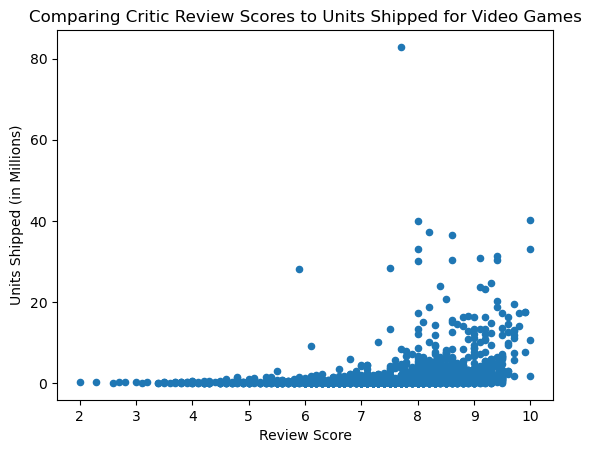

In [348]:
df.plot.scatter(x='Critic_Score', y='Total_Shipped', xlabel = 'Review Score', ylabel = 'Units Shipped (in Millions)', title = 'Comparing Critic Review Scores to Units Shipped for Video Games')
p.show()

## Fixing the graph
I did not realize until experimenting with graphing that the game that shipped over 80 million copies was such a strong outlier. I also didn't consider the sheer amount of games that shipped under one million copies across nearly every possible user and critic score. This flatline of games selling under one million copies only weighs down the average values and covers up other points on the graph, muddying any possible conclusions about the relationship between review scores and commercial performance. For these reasons, I will exclude any games that shipped under one million copies from the analysis. I will also add a line of best fit using seaborn because the high concentration of points in the same location makes it impossible to estimate the line of best fit just by looking at the visualization.

In [350]:
df.drop(0, inplace = True)
df = df[df['Total_Shipped'] >= 1]

## Graphing again

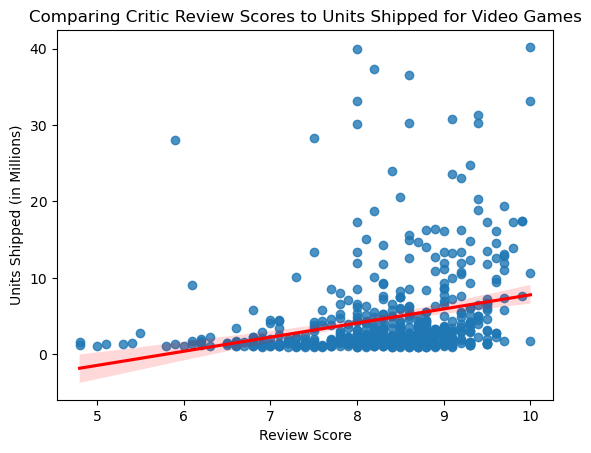

In [352]:
g = sb.regplot(data = df, x = 'Critic_Score', y = 'Total_Shipped', line_kws = {'color':'red'})
g.set(xlabel = 'Review Score', ylabel = 'Units Shipped (in Millions)', title = 'Comparing Critic Review Scores to Units Shipped for Video Games')
p.show()

## Analysis
There are a lot of things to take apart when looking at this graph. 

First of all, the review scores on the X-axis start at around 4.5 instead of 1, which means that there must not be a single game with a critic review score under 4.5 to sell at least one million copies. While this could be interpreted as a positive in terms of the accuracy of the reviews, it also means that a game that recieved a 4 will not sell much better then a game that scored a 1, potentially making any score between 1 and 4.5 useless in terms of predicting commercial success as they all result in virtually the same outcome.


The line of best fit, while reasonable for scores starting at 6.5, goes into the negatives until the score reaches 6.5. This is, clearly, a poor overall coorelation for the line of best fit to not hit a single point for the first fifth of the graph, and suggest negative units being sent out, something that is obviously impossible.

This questionable line of best fit and strange exclusion of review scores 1-4.5 have led me to the conclusion that critic review scores do not accurately predict or relfect the commercial success of a video game, and they are oftentimes unreliable and or completely irrelevant in terms of commercial performance.

## Graphing to answer the second question

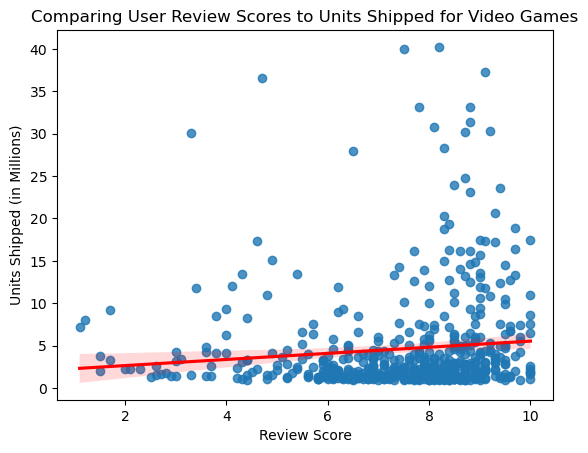

In [355]:
g = sb.regplot(data = df, x = 'User_Score', y = 'Total_Shipped', line_kws = {'color':'red'})
g.set(xlabel = 'Review Score', ylabel = 'Units Shipped (in Millions)', title = 'Comparing User Review Scores to Units Shipped for Video Games')
p.show()

## Analysis
Unlike the graph for critic review scores, the user review scores have a clear line of best fit that does not pass into any impossible values and the graph has an x-axis that includes all review scores, not just 4.5-10. Though the line of best fit here is a little more flat, it's much more consistent with hitting points and presents a more realistic coorelation between review scores and commercial success that always results in values that are possible (no negative sales). Because of these reasons I believe that user review scores do relfect/predict a video game's commercial success.